<a href="https://colab.research.google.com/github/MOKUAGU/Codes/blob/main/Copy_of_CS_167_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #1
# Name: Munachi Okuagu

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import sklearn
import pandas as pd 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.dummy import DummyClassifier

# load data
car_data = pd.read_csv('/content/drive/MyDrive/CS167DATASETS/CarPricesProject1.csv')
car_data.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


# Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments - creation of dummy variables, filling in missing values, etc.

clean the data 
 regression - had drop the column of car name it was cluttering the data set and was not neccessary when doing regression. 

In [ ]:
cars = car_data.copy()

cars.drop(columns=["CarName"],inplace = True)

symboling_mean = cars['symboling'].mean()
cars['symboling'].fillna(symboling_mean, inplace=True)


wheelbase_mean = cars['wheelbase'].mean()
cars['wheelbase'].fillna(wheelbase_mean, inplace=True)

carlength_mean = cars['carlength'].mean()
cars['carlength'].fillna(carlength_mean, inplace=True)

carwidth_mean = cars['carwidth'].mean()
cars['carwidth'].fillna(carwidth_mean, inplace=True)

carheight_mean = cars['carheight'].mean()
cars['carheight'].fillna(carheight_mean, inplace=True)

curbweight_mean = cars['curbweight'].mean()
cars['curbweight'].fillna(curbweight_mean, inplace=True)

boreratio_mean = cars['boreratio'].mean()
cars['boreratio'].fillna(boreratio_mean, inplace=True)

stroke_mean = cars['stroke'].mean()
cars['stroke'].fillna(stroke_mean, inplace=True)

compressionratio_mean = cars['compressionratio'].mean()
cars['compressionratio'].fillna(compressionratio_mean, inplace=True)

horsepower_mean = cars['horsepower'].mean()
cars['horsepower'].fillna(horsepower_mean, inplace=True)

peakrpm_mean = cars['peakrpm'].mean()
cars['peakrpm'].fillna(peakrpm_mean, inplace=True)

citympg_mean = cars['citympg'].mean()
cars['citympg'].fillna(citympg_mean, inplace=True)

highwaympg_mean = cars['highwaympg'].mean()
cars['highwaympg'].fillna(highwaympg_mean, inplace=True)

price_mean = cars['price'].mean()
cars['price'].fillna(price_mean, inplace=True)

#classificationdata 

cars = pd.get_dummies(cars, columns=['fueltype', 'aspiration', 'doornumber', 'doornumber','carbody','drivewheel','enginelocation','enginetype', 'cylindernumber','enginesize','fuelsystem'])


print(cars.isna().any())


symboling          False
wheelbase          False
carlength          False
carwidth           False
carheight          False
                   ...  
fuelsystem_idi     False
fuelsystem_mfi     False
fuelsystem_mpfi    False
fuelsystem_spdi    False
fuelsystem_spfi    False
Length: 97, dtype: bool


cleaned the data- want all the values to print out false because that means there are no missing values in that column. 
I also created a few dummy variables for the categorical data that did not have a numerical value in the column so when running the regression model those values would have some weight. 

In [ ]:
target_value= 'price'
predictors = cars.columns.drop(target_value) 
train_data, test_data, train_sln, test_sln = train_test_split(cars[predictors], cars[target_value], test_size = 0.2, random_state=41)
train_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,...,enginesize_308.0,enginesize_326.0,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
190,3.0,94.5,165.7,64.0,51.4,2221.0,3.19,3.40,8.5,90.0,...,0,0,0,0,0,0,0,1,0,0
106,1.0,99.2,178.5,67.9,49.7,3139.0,3.43,3.27,9.0,160.0,...,0,0,0,0,0,0,0,1,0,0
83,3.0,95.9,173.2,66.3,50.2,2921.0,3.59,3.86,7.0,145.0,...,0,0,0,0,0,0,0,0,1,0
153,0.0,95.7,169.7,63.6,59.1,2280.0,3.05,3.03,9.0,62.0,...,0,0,0,1,0,0,0,0,0,0
23,1.0,93.7,157.3,63.8,50.8,2128.0,3.03,3.39,7.6,102.0,...,0,0,0,0,0,0,0,1,0,0


using the .getdummies function for any columns with categorical data to change them to 0 or 1 because when doing regression you have to have only numerical values for a better prediction. 

In [ ]:
#normalize data  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

#now use test data and normalized data 

^normalized the data to get all the values on the same scale which is better for representation amongst all data columns. 

# Part 1: Regression
How well can you predict target value `price`?

- **Metrics**: Identify which metrics you will be using to test your model, and say why they are appropriate. Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly?


my metrics for the regression 

for the knn algorithm I would predict the algorithm to perform well because KNN works better when working with larger scale numerical data- the metrics I will be using is r^2 and MSE because those are the standard metrics for regression so I am expecting them to perform well and for my r^2 to be close to 1. 
What I would expect to happen: I would expect my numbers to be more accurate because 


In [ ]:
#KNN 
from sklearn import neighbors
from sklearn import metrics

# create our model
neigh = neighbors.KNeighborsRegressor(n_neighbors= 3)

# fit (train) the model to the data
neigh.fit(train_data_normalized, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data_normalized)


# use a metric to see how good our predictions are; Don't miss this! Using Regression metrics here!!
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  13292154.941848148
r2:  0.6484838130518773


r^2 is highest when neighbors = 3 in comparison to 5 (standard) any higher and the predictions decline. 

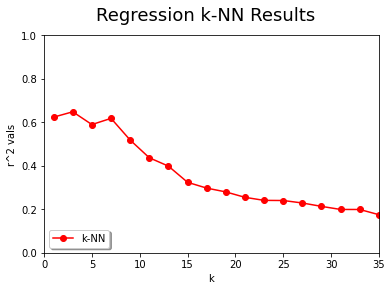

In [ ]:
#KNN
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics
 
# explore different values of k
k_vals = range(1,41,2)
r2_vals = []
for k in k_vals:
  neigh = neighbors.KNeighborsRegressor(n_neighbors = k ) 
  neigh.fit(train_data_normalized,train_sln)
  predictions = neigh.predict(test_data_normalized)
  r2_val = sklearn.metrics.r2_score(test_sln, predictions)
  r2_vals.append(r2_val)
 
plt.suptitle('Regression k-NN Results',fontsize=18)
plt.xlabel('k')
plt.ylabel('r^2 vals')
plt.plot(k_vals,r2_vals,'ro-',label='k-NN')
 
plt.legend(loc='lower left', shadow=True)
plt.axis([0,35,0,1]) 
plt.show()


based off the graphs when my K is at 7 that is peak val, as the K increases we start to see a decline. telling us that our k peak is between 7-10. which is interesting because when I was adjusting the metrics above when i set n= 3 that gave me the highest r^2 value. 

- **Initial Models**: Develop basic code for kNN, weighted kNN, and Decision Trees. Make some experiments here, including graphs to help you identify which algorithm and parameters may be best.


In [ ]:
#weighted KNN 

# w-knn with small k
# weighted
neigh = neighbors.KNeighborsRegressor(weights = "distance", n_neighbors=15)
#4. Call fit (to train the classification/regression model)
neigh.fit(train_data_normalized,train_sln)
#5. Call predict to generate predictions
car_prices_predictions = neigh.predict(test_data_normalized)
#6. Call a metric function to measure performance

print('MSE: ', metrics.mean_squared_error(test_sln, car_prices_predictions))
print('r2: ', metrics.r2_score(test_sln, car_prices_predictions))

MSE:  21571274.047778044
r2:  0.4295393008837708


with the weighted algorithm the optimal value is 3 when looking at r^2. when n = a value higher than 5 the r^2 is lower.  

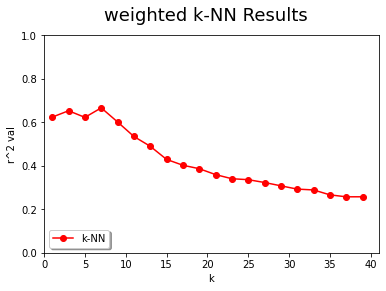

In [ ]:
#KNN- weighted 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics
 
# explore different values of k
k_vals = range(1,41,2)
r2_vals = []
for k in k_vals:
  neigh = neighbors.KNeighborsRegressor(n_neighbors = k,weights = "distance" ) 
  neigh.fit(train_data_normalized,train_sln)
  predictions = neigh.predict(test_data_normalized)
  r2_val = sklearn.metrics.r2_score(test_sln, predictions)
  r2_vals.append(r2_val)
 
plt.suptitle('weighted k-NN Results',fontsize=18)
plt.xlabel('k')
plt.ylabel('r^2 val')
plt.plot(k_vals,r2_vals,'ro-',label='k-NN')
 
plt.legend(loc='lower left', shadow=True)
plt.axis([0,41,0,1]) 
plt.show()


analyzing the graph: the graph does look similar to the non weight knn which is not bad. the max depth lies between 7-10 but if I zoom in on the graph it is 7. 

In [ ]:
#decision tree 
# decision tree with some kind of parameter that (hopefully) results in a smaller tree
# decision tree with default paramters
#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeRegressor(random_state = 0, max_depth=5, min_samples_split= 2 ) #If None, then nodes are expanded until all leaves are pure or until all leaves contain less

#4. Call fit (to train the classification/regression model)
dt.fit(train_data_normalized,train_sln)

#5. Call predict to generate predictions
car_prices_predictions = dt.predict(test_data_normalized)

#6. Call a metric function to measure performance

print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print("r2", metrics.r2_score(test_sln,car_prices_predictions))

MSE:  28072433.0432472
r2 0.7851488273530622


when looking at the decision tree r^2 metrics they output similar values as the KNN which is something I did not expect because typically the KNN performs a little bit better but it seems with this data set in particular they performed relatively the same. the R^2 does increase after adjusting the max_depth which is good- the more in depth the tree is able to go the more accurate the prediction gets (expected) 
the MSE is performing overall well and the numbers are accurate based off the data i am analyzing. 

- **Fine Tuning**: Create graphs to help you identify the **optimal** values of parameters you wish to use. Utilize different train/test splits. Full credit for thorough testing and documentation.


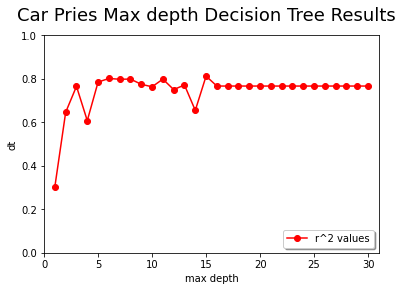

In [ ]:
#regression decision tree
# explore different values of k
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics


max_dt_vals = range(1,31)
r2_vals = []


for depth in max_dt_vals:
    dt = tree.DecisionTreeRegressor(random_state = 0, max_depth = depth)
    dt.fit(train_data_normalized,train_sln)
    predictions = dt.predict(test_data_normalized)
    r2_val = sklearn.metrics.r2_score(test_sln,predictions)
    r2_vals.append(r2_val)
    
plt.suptitle('Car Pries Max depth Decision Tree Results',fontsize=18)
plt.xlabel('max depth')
plt.ylabel('dt')
plt.plot(max_dt_vals,r2_vals,'ro-',label='r^2 values')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,31,0,1])
plt.show()


- **Analysis**: What did you determine? What did you notice? How did you identify which learning algorithms you will try and which important parameters you will tune for each one? What is your predictions for the 'competition testing set'.

the graph for the decision tree was different from my other graphs but there is actually a dip in the graph at 7 max depth which is quite interesting because that was the high point for the KNN weighted and non weighted. overall I determined that I think the decision tree performed better in terms of r^2 out put. I tuned the max depth and changed it to 5 which gave me a higher r^2 score. 

# Part 2: Classification
How well can you predict `carbody`?

use CONFUSION MATRIX 

first i start off with cleaning my data and making sure all columns have a value in them- if not replacing them with 0 or 1. I have to do this because i am now doing classification so to start off clean (no pun intended) I want to make sure all the data is ready to go. I also did the similar process of dropping the column 'carname' because it was cluttering the data. 

In [ ]:
car_data_clf = pd.read_csv('/content/drive/MyDrive/CS167DATASETS/CarPricesProject1.csv')
car_data_clf.drop(columns=["CarName"],inplace = True)

cars_clf = car_data_clf.copy()

#cars.drop(columns=["CarName"],inplace = True)


symboling_mean = cars_clf['symboling'].mean()
cars_clf['symboling'].fillna(symboling_mean, inplace=True)


wheelbase_mean = cars_clf['wheelbase'].mean()
cars_clf['wheelbase'].fillna(wheelbase_mean, inplace=True)

carlength_mean = cars_clf['carlength'].mean()
cars_clf['carlength'].fillna(carlength_mean, inplace=True)

carwidth_mean = cars_clf['carwidth'].mean()
cars_clf['carwidth'].fillna(carwidth_mean, inplace=True)

carheight_mean = cars_clf['carheight'].mean()
cars_clf['carheight'].fillna(carheight_mean, inplace=True)

curbweight_mean = cars_clf['curbweight'].mean()
cars_clf['curbweight'].fillna(curbweight_mean, inplace=True)

boreratio_mean = cars_clf['boreratio'].mean()
cars_clf['boreratio'].fillna(boreratio_mean, inplace=True)

stroke_mean = cars_clf['stroke'].mean()
cars_clf['stroke'].fillna(stroke_mean, inplace=True)

compressionratio_mean = cars_clf['compressionratio'].mean()
cars_clf['compressionratio'].fillna(compressionratio_mean, inplace=True)

horsepower_mean = cars_clf['horsepower'].mean()
cars_clf['horsepower'].fillna(horsepower_mean, inplace=True)

peakrpm_mean = cars_clf['peakrpm'].mean()
cars_clf['peakrpm'].fillna(peakrpm_mean, inplace=True)

citympg_mean = cars_clf['citympg'].mean()
cars_clf['citympg'].fillna(citympg_mean, inplace=True)

highwaympg_mean = cars_clf['highwaympg'].mean()
cars_clf['highwaympg'].fillna(highwaympg_mean, inplace=True)

price_mean = cars_clf['price'].mean()
cars_clf['price'].fillna(price_mean, inplace=True)

#classificationdata 
cars_clf.dropna(subset=["carbody"],inplace=True)
cars_clf = pd.get_dummies(cars_clf, columns=['fueltype', 'aspiration', 'doornumber', 'doornumber','price','drivewheel','enginelocation','enginetype', 'cylindernumber','enginesize','fuelsystem'])


print(cars_clf.isna().any())



symboling          False
carbody            False
wheelbase          False
carlength          False
carwidth           False
                   ...  
fuelsystem_idi     False
fuelsystem_mfi     False
fuelsystem_mpfi    False
fuelsystem_spdi    False
fuelsystem_spfi    False
Length: 280, dtype: bool


In [ ]:
target_value_clf = 'carbody'
predictors_clf = cars_clf.columns.drop(target_value_clf) 
train_data, test_data, train_sln, test_sln = train_test_split(cars_clf[predictors_clf], cars_clf[target_value_clf], test_size = 0.2, random_state=41)
train_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,...,enginesize_308.0,enginesize_326.0,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
190,3.0,94.5,165.7,64.0,51.4,2221.0,3.19,3.40,8.5,90.0,...,0,0,0,0,0,0,0,1,0,0
107,0.0,107.9,186.7,68.4,56.7,3020.0,3.46,3.19,8.4,97.0,...,0,0,0,0,0,0,0,1,0,0
83,3.0,95.9,173.2,66.3,50.2,2921.0,3.59,3.86,7.0,145.0,...,0,0,0,0,0,0,0,0,1,0
154,0.0,95.7,169.7,63.6,59.1,2290.0,3.05,3.03,9.0,62.0,...,0,0,0,1,0,0,0,0,0,0
23,1.0,93.7,157.3,63.8,50.8,2128.0,3.03,3.39,7.6,102.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#normalize data  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized_clf = scaler.transform(train_data)
test_data_normalized_clf = scaler.transform(test_data)

data has been normalized 

- **Metrics**: Identify which metrics you will be using to test your model, and say why they are appropriate. Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly?


Metrics: accuracy
Accuracy is the appropriate metric because it is a good metric to use when using classification and to print out the most accurate column for the carbody. since we are working with categorical data using this metric would be a better output rather than just randomly guessing.

- **Initial Models**: Develop basic code for kNN, weighted kNN, and Decision Trees. Make some experiments here, including graphs to help you identify which algorithm and parameters may be best.


In [ ]:
#KNN Classification 
#KNN 
from sklearn import neighbors
from sklearn import metrics

# create our model
neigh = neighbors.KNeighborsClassifier( n_neighbors = 10) ### Don't miss this! Doing Regression here!!

# fit (train) the model to the data
neigh.fit(train_data_normalized_clf, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data)


# use a metric to see how good our predictions are; Don't miss this! Using Regression metrics here!!
print('acc: ', metrics.accuracy_score(test_sln, predictions))


acc:  0.4634146341463415


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


when the neighbors is 3 acc = .12 
when the neighbors is 6 acc = .0731
when the neighbors is 10 acc = .46
so with a little tuning of the parameters i got the accuracy to raise a little bit higher which is good. 

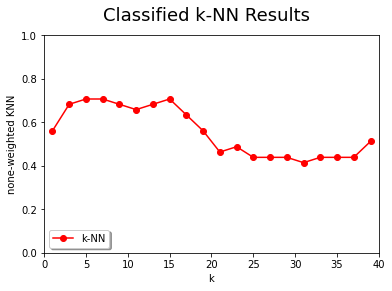

In [ ]:
#KNN classification
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics
 
# explore different values of k
k_vals = range(1,41,2)
accuracies=[]
for k in k_vals:
  neigh = neighbors.KNeighborsClassifier(n_neighbors = k) 
  neigh.fit(train_data_normalized_clf,train_sln)
  predictions = neigh.predict(test_data_normalized_clf)
  acc = sklearn.metrics.accuracy_score(test_sln, predictions)
  accuracies.append(acc)

plt.suptitle('Classified k-NN Results',fontsize=18)
plt.xlabel('k')
plt.ylabel('none-weighted KNN')
plt.plot(k_vals,accuracies,'ro-',label='k-NN')
 
plt.legend(loc='lower left', shadow=True)
plt.axis([0,40,0,1]) 
plt.show()

- **Fine Tuning**: Create graphs to help you identify the **optimal** values of parameters you wish to use. Utilize different train/test splits. Full credit for thorough testing and documentation.


optimal value for this based off the graph is ranging 15 or 16. when i adjusted the parameters to the optimal values the accuracy actully declined so that was interesting to analyze that when testing it my optimal value may have been 9 or 10. 

In [ ]:
#weighted KNN 

# w-knn with small k
# weighted
neigh = neighbors.KNeighborsClassifier(weights = "distance", n_neighbors=5)
#4. Call fit (to train the classification/regression model)
neigh.fit(train_data_normalized_clf,train_sln)
#5. Call predict to generate predictions
car_prices_predictions = neigh.predict(test_data_normalized_clf)
#6. Call a metric function to measure performance
print('acc: ', metrics.accuracy_score(test_sln, predictions))



acc:  0.5121951219512195


the peak accuracy was .46 which is when my n_neighbors is set to 3. I was expecting it to be a little bit lower because the values are weighted on the same scale so I was suprised when the output was pretty much the same. 

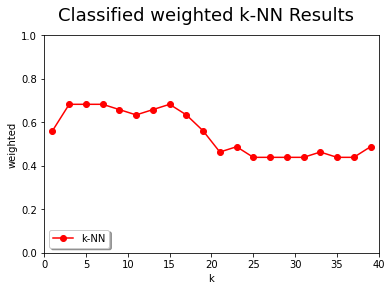

In [ ]:
#KNN- weighted 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics
 
# explore different values of k
k_vals = range(1,41,2)
accuracies=[]
for k in k_vals:
  neigh = neighbors.KNeighborsClassifier(n_neighbors = k,weights = "distance" ) 
  neigh.fit(train_data_normalized_clf,train_sln)
  predictions = neigh.predict(test_data_normalized_clf)
  acc = sklearn.metrics.accuracy_score(test_sln, predictions)
  accuracies.append(acc)

plt.suptitle('Classified weighted k-NN Results',fontsize=18)
plt.xlabel('k')
plt.ylabel('weighted')
plt.plot(k_vals,accuracies,'ro-',label='k-NN')
 
plt.legend(loc='lower left', shadow=True)
plt.axis([0,40,0,1]) 
plt.show()

what I determined was that both the weighted and non weighted were giving similar outputs which is good because at least the data is balanced and more accurate this gives a better look at what my optimal values are when analyzing the dataset. i identified that I will be using the weighted nearest neighbors because it gave me the best outcome as for the parameters I adjust it was just the n_neighbors because so far it has given me the best accuracy output. my prediction for the competition set would be that the decision tree will still outperform the knn algorithm in classification. 

- **Analysis**: What did you determine? What did you notice? How did you identify which learning algorithms you will try and which important parameters you will tune for each one? What is your predictions for the 'competition testing set'.

*don't forget to print out a confusion matrix*

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
carbody_labels = ['convertible','hardtop','hatchback', 'sedan','wagon']
conf_matrix = metrics.confusion_matrix(test_sln,predictions, labels = carbody_labels)
print(pd.DataFrame(conf_matrix,index = carbody_labels, columns = carbody_labels))

             convertible  hardtop  hatchback  sedan  wagon
convertible            0        1          1      0      0
hardtop                0        2          0      0      0
hatchback              0        2         13      1      0
sedan                  1        0          2     13      0
wagon                  0        0          0      1      4


this confusion matrix is showing me that the the hatchback and sedan have the most that are predicted to be true with the wagon coming in 3rd... this is important because it helps me visualize important analysis about the data. it gives me direct understanding about true positives, false positives etc. they are also accurate and precise which is helpful in this case. the confusion matrix also gives an adequate evaluation of the classification model overall, so when the matrix makes a prediction on the data it gives an accurate prediction on the test data and shows me how well my classification model is. 

In [ ]:
# decision tree with default paramters
#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier() #If None, then nodes are expanded until all leaves are pure or until all leaves contain less

#4. Call fit (to train the classification/regression model)
dt.fit(train_data_normalized_clf,train_sln)

#5. Call predict to generate predictions
car_prices_predictions = dt.predict(test_data_normalized_clf)

#6. Call a metric function to measure performance
print('acc: ', metrics.accuracy_score(test_sln, predictions))


acc:  0.7560975609756098


as predicted the decision tree gave me the most accurate out come. since the accuracy range is around 70-90% the decision tree performed well! i found it to perform best when I was not calling any parameters/ran relatively the same with max_depth parameters set. 

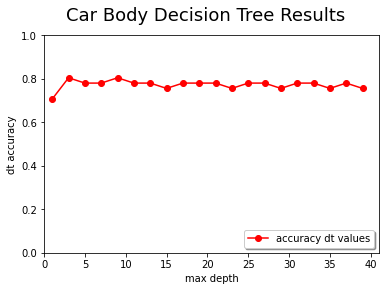

In [ ]:
#DECISION TREE GRAPH 
#classification decision tree
# explore different values of k
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics


max_dt_vals = range(1,40,2)
accuracies = []

for dt in max_dt_vals:
    dt = tree.DecisionTreeClassifier( max_depth = dt)
    dt.fit(train_data_normalized_clf,train_sln)
    predictions = dt.predict(test_data_normalized_clf)
    acc = sklearn.metrics.accuracy_score(test_sln, predictions)
    accuracies.append(acc)

plt.suptitle('Car Body Decision Tree Results',fontsize=18)
plt.xlabel('max depth')
plt.ylabel('dt accuracy')
plt.plot(max_dt_vals,accuracies,'ro-',label='accuracy dt values')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,41,0,1])
plt.show()

# Part 3: Conclusions

**Bumps in the Road**: What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?


Some of the challenges I have encountered while working on the project: adjusting my graphs to print out the right metrics for my normalized data and training data. I overcame this challenge by utilizing classroom material to help me visualize what I need to change to make my graphs work properly. It was like putting a puzzle together because I was trying to figure out where each line of code goes and what parameters to put in to give the most optimal output. While doing this project I found myself adapting that strategy to every section I was doing, adjusting the code and looking at the output I was getting and changing it to see how I can change it to give me a better out put.

Another bump I hit in the road was determining which graph was performing better (knn or non weighted) because it kind of confused me when they iniatially printed because they looked relatively similar so I was not sure which one was working better. I overcame this bump in the road by asking for help, and getting clarification that it is good that the graphs are giving similar output.

**Conclusions:** What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

Some recommendations I have is trying as many metrics and making various adjustments to your model to see which outcome would prove to be the best, and so visually you can see your data and how it is performing (you can see the changes you need to make). I found interesting that in both the regression and the classification model the decision tree kind of out performed kNN, that was unexpected and I did not think that would be the case, at least for regression. I think between the two I got better results with my classification model, but the regression model was working just as well graphical. I think that both pulled their own weight and gave me pretty good results across the board. In the case of classification though 
my accuracy was higher and my decision graphs were giving me better output as well which is something I was kind of surprised by but overall it worked out well. But with my regression model my KNN graphs were giving me optimal output which was overall good for predictive modeling. 
